In [125]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd


plt.rcParams["figure.figsize"] = (10,8)



In [126]:

# open the file of interest, and use pickle loading
infile = open ("higgs.pkl",'rb')
higgs = pickle.load(infile)


infile = open ("qcd.pkl",'rb')

qcd = pickle.load(infile)

# list all keys of the files
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

##### 1.Make a stacked histogram plot for the feature variable: mass.Evaluate expected significance without any event selection.Use Poisson statistics for significance calculation. Compare your number of  𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷). If they are equivalent, explain your findings.

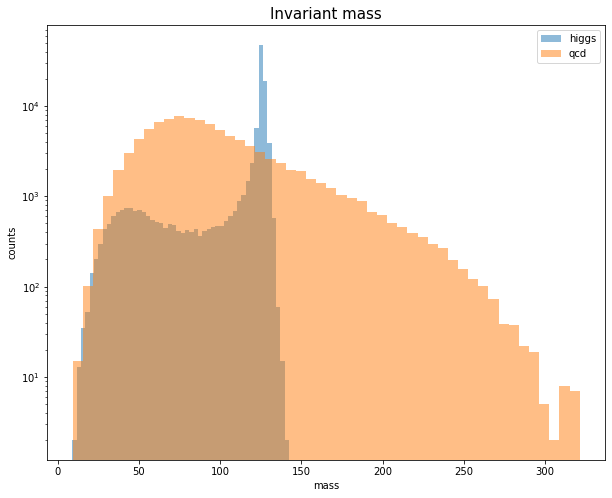

In [127]:
plt.hist(higgs['mass'],bins=50, alpha=0.5,label='higgs',stacked=True)
plt.hist(qcd['mass'],bins=50,alpha=0.5,label='qcd', stacked=True)
plt.legend()
plt.xlabel("mass", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("Invariant mass",size=15);

The expected yields of Nqcd= 2000, and the expected yields of Nhiggs= 100.

In [128]:
sigp= scipy.stats.norm.isf(stats.poisson.sf(2100, mu=2000))
print("The significance of observing Higgs (significance of measuring Nqcd+Nhiggs) is {:.2f}.".format(sigp))


The significance of observing Higgs (significance of measuring Nqcd+Nhiggs) is 2.23.


In [129]:
sigc=100/(np.sqrt(2000))
print("𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) = {:.2f}".format(sigc))

𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) = 2.24


The signifance calculated form Poisson statistics is very close to number of 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷). They only differ by 0.1. We know from Central Limiting Theorem that as the mean value increases, the Poisson distribution approaches a Gaussian distribution. This tells us that the distribution is very close to a Gaussian distribution, and we may use 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) to approximate significance. 

##### 2.Identify mass cuts to optimize the expected significance.Try different mass cuts systematically.Evaluate expeced significance for each set of mass cuts.Identify the set of the mass cuts which give you the highest significance.

Try different upper boundaries.

In [130]:
cuts= np.linspace(120,max(higgs['mass']),10)

for i in range(len(cuts)):
    counth=0
    countq=0
    for j in range(len(higgs['mass'])):
        if higgs['mass'][j] <= cuts[i]:
            counth+=1
        if qcd['mass'][j] <= cuts[i]:
            countq+=1
    print("mass cut: {:.2f}".format(cuts[i])) 
    Ncounth=counth*100/100000
    Ncountq=countq*2000/100000
    sig=Ncounth/(np.sqrt(Ncountq))
    print("𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): {:.2f}".format(sig))
    i+=1  

mass cut: 120.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 0.56
mass cut: 122.49
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 0.64
mass cut: 124.99
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 0.98
mass cut: 127.48
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.18
mass cut: 129.97
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.43
mass cut: 132.47
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.46
mass cut: 134.96
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.46
mass cut: 137.45
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.44
mass cut: 139.95
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.43
mass cut: 142.44
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.42


Try different lower boundaries.

In [131]:
cuts= np.linspace(95,130,10)
cutval=[]
sigval=[]
for i in range(len(cuts)):
    counth=0
    countq=0
    for j in range(len(higgs['mass'])):
        if higgs['mass'][j] >= cuts[i]:
            counth+=1
        if qcd['mass'][j]>= cuts[i]:
            countq+=1
    Ncounth=counth*100/100000
    Ncountq=countq*2000/100000
    sig=Ncounth/(np.sqrt(Ncountq))
    #cutval.append(cuts[i])
    #sigval.append(sig)
    print("mass cut: {:.2f}".format(cuts[i])) 
    print("𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): {:.2f}".format(sig))
    i+=1



mass cut: 95.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 2.93
mass cut: 98.89
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.04
mass cut: 102.78
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.15
mass cut: 106.67
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.26
mass cut: 110.56
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.37
mass cut: 114.44
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.47
mass cut: 118.33
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.54
mass cut: 122.22
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 3.51
mass cut: 126.11
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 1.41
mass cut: 130.00
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 0.11


After comparison, the mass cut [118.33,142.44] gives good significance.

In [132]:
cuts=[118.33,142.44]

indexh=[]
indexq=[]

counth=0
countq=0
for j in range(len(higgs['mass'])):
    if higgs['mass'][j] >= cuts[0] and higgs['mass'][j]<= cuts[1] :
        indexh.append(j)
        counth+=1
    if qcd['mass'][j]>= cuts[0] and qcd['mass'][j]<= cuts[1] :
        indexq.append(j)
        countq+=1
Ncounth=counth*100/100000
Ncountq=countq*2000/100000
sig=Ncounth/(np.sqrt(Ncountq))
#cutval.append(cuts[i])
#sigval.append(sig)
print("mass cut: [118.33,142.44]") 
print("Nhiggs= {:.0f}".format(Ncounth))
print("Nqcd= {:.0f}".format(Ncountq))
print("𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): {:.2f}".format(sig))


mass cut: [118.33,142.44]
Nhiggs= 79
Nqcd= 210
𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷): 5.48


##### 3.Make stacked histogram plots for the rest of features. Set A of plots without any event selection. Can you identify another feature as discriminative as mass feature (i.e. equal or better significance after feature cut). Set B of plots with your optimal mass cuts. Can you identify additional feature to further imrpove expected signifiance?

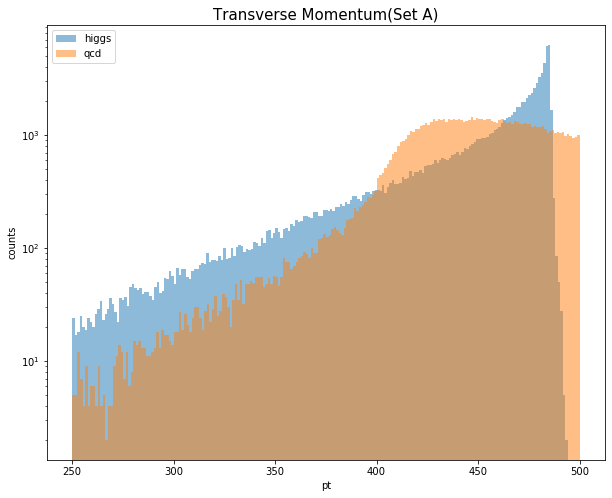

In [133]:
plt.hist(higgs['pt'],bins=200,alpha=0.5,label='higgs')
plt.hist(qcd['pt'],bins=200,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("pt", size=10)
plt.ylabel("counts",size=10)
plt.title("Transverse Momentum(Set A)",size=15) 
plt.yscale('log');

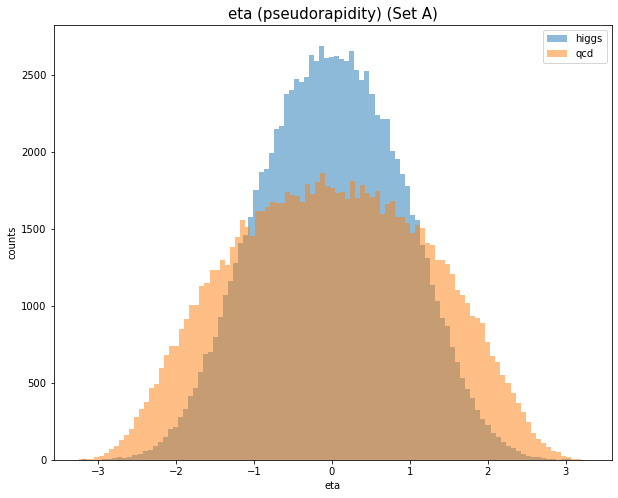

In [134]:
plt.hist(higgs['eta'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['eta'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("eta", size=10)
plt.ylabel("counts",size=10)
plt.title("eta (pseudorapidity) (Set A)",size=15);

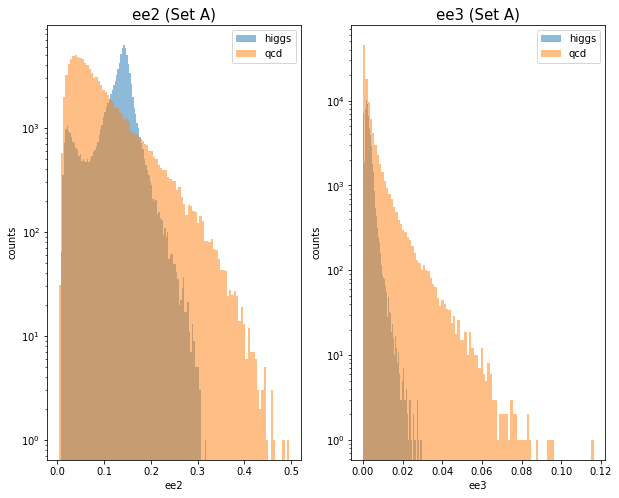

In [135]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.hist(higgs['ee2'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['ee2'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("ee2", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("ee2 (Set A)",size=15)
plt.subplot(1,2,2)
plt.hist(higgs['ee3'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['ee3'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("ee3", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("ee3 (Set A)",size=15);


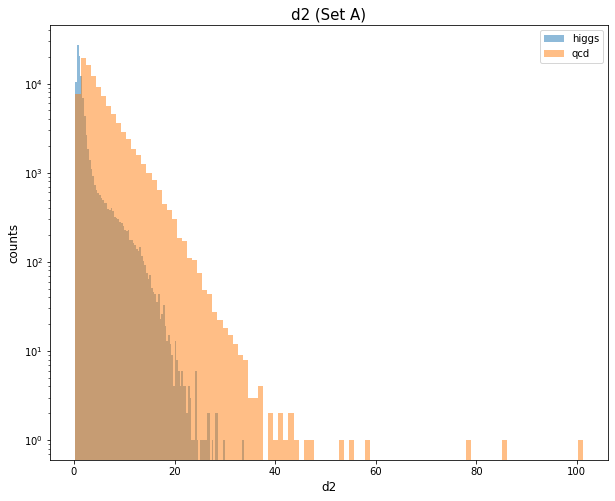

In [136]:
plt.hist(higgs['d2'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['d2'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("d2", size=12)
plt.yscale('log')
plt.ylabel("counts",size=12)
plt.title("d2 (Set A)",size=15);

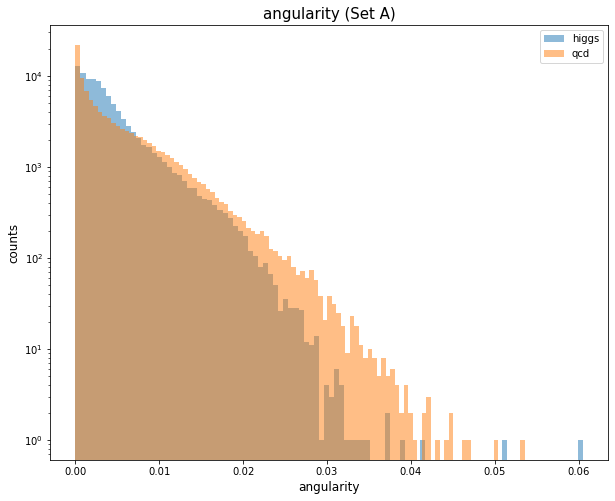

In [137]:
plt.hist(higgs['angularity'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['angularity'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("angularity", size=12)
plt.yscale('log')
plt.ylabel("counts",size=12)
plt.title("angularity (Set A)",size=15);


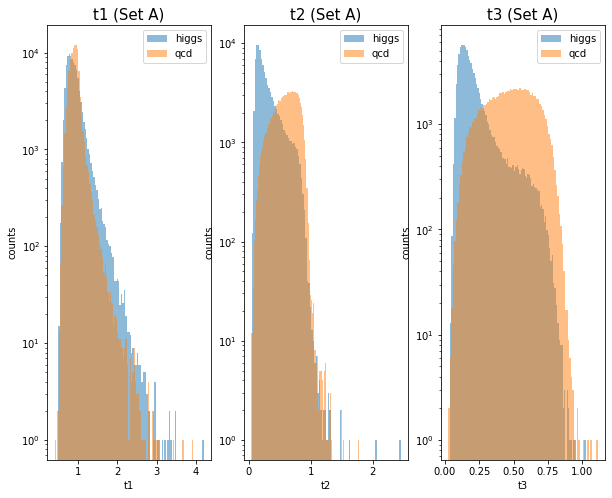

In [138]:
plt.subplots(1,3)
plt.subplot(1,3,1)
plt.hist(higgs['t1'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t1'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t1", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t1 (Set A)",size=15)

plt.subplot(1,3,2)
plt.hist(higgs['t2'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t2'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t2", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t2 (Set A)",size=15)

plt.subplot(1,3,3)
plt.hist(higgs['t3'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t3'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t3", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t3 (Set A)",size=15);

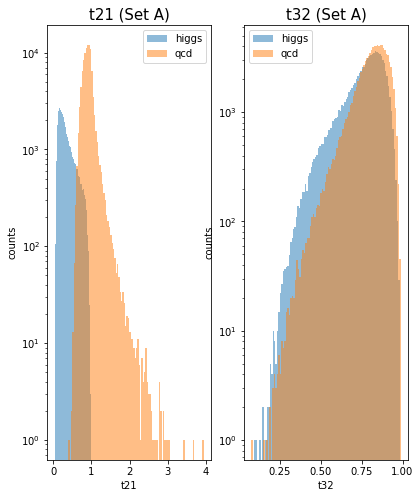

In [139]:
plt.subplots(1,2)
plt.subplot(1,3,1)
plt.hist(higgs['t21'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t1'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t21", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t21 (Set A)",size=15)

plt.subplot(1,3,2)
plt.hist(higgs['t32'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t32'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t32", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t32 (Set A)",size=15);

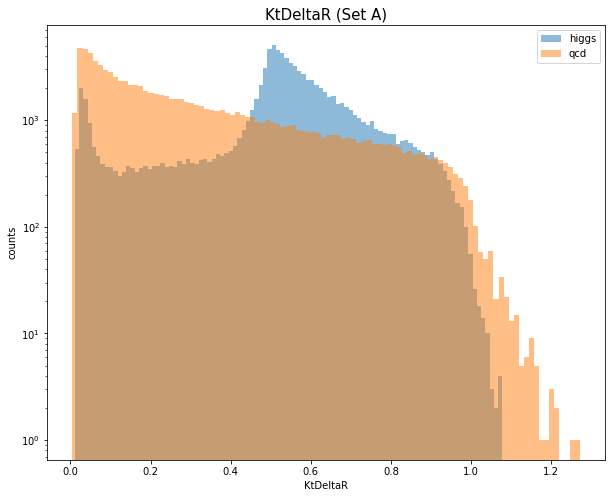

In [140]:
plt.hist(higgs['KtDeltaR'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['KtDeltaR'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("KtDeltaR", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("KtDeltaR (Set A)",size=15);

Transver momentum, eta,t3, t21 and KtDeltaR are discriminative.

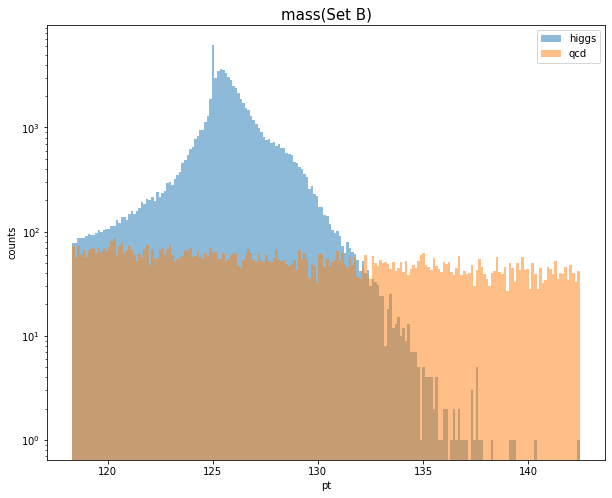

In [141]:
plt.hist(higgs['mass'][indexh],bins=200,alpha=0.5,label='higgs')
plt.hist(qcd['mass'][indexq],bins=200,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("pt", size=10)
plt.ylabel("counts",size=10)
plt.title("mass(Set B)",size=15) 
plt.yscale('log');

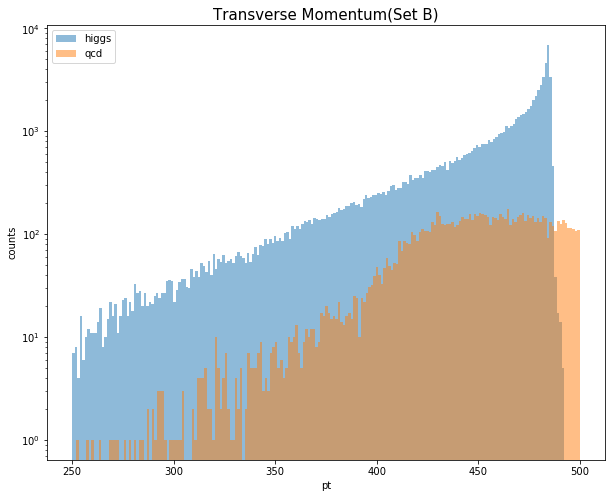

In [142]:
plt.hist(higgs['pt'][indexh],bins=200,alpha=0.5,label='higgs')
plt.hist(qcd['pt'][indexq],bins=200,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("pt", size=10)
plt.ylabel("counts",size=10)
plt.title("Transverse Momentum(Set B)",size=15) 
plt.yscale('log');

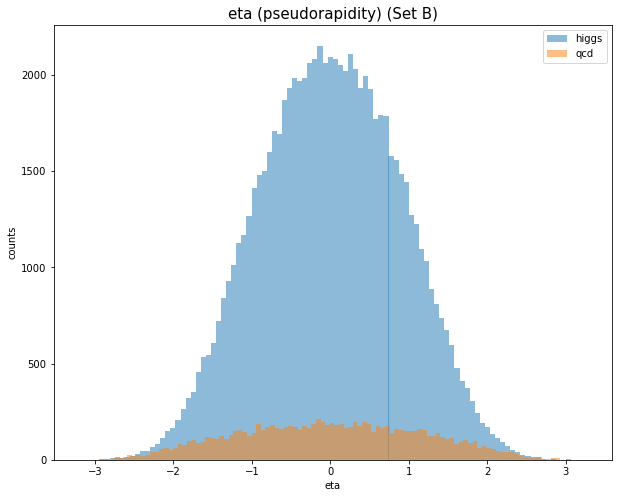

In [143]:
plt.hist(higgs['eta'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['eta'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("eta", size=10)
plt.ylabel("counts",size=10)
plt.title("eta (pseudorapidity) (Set B)",size=15);

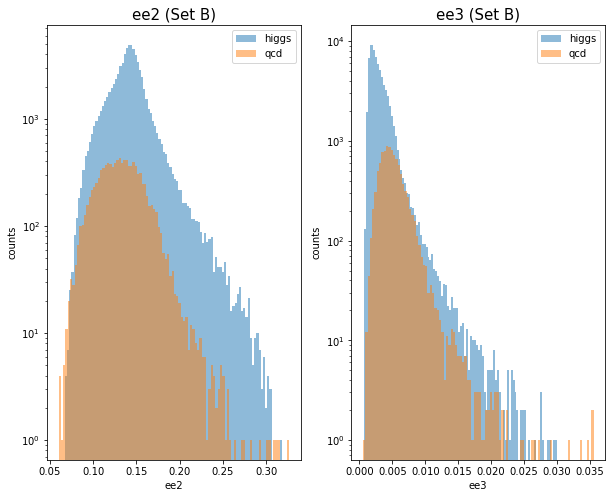

In [144]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.hist(higgs['ee2'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['ee2'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("ee2", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("ee2 (Set B)",size=15)
plt.subplot(1,2,2)
plt.hist(higgs['ee3'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['ee3'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("ee3", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("ee3 (Set B)",size=15);



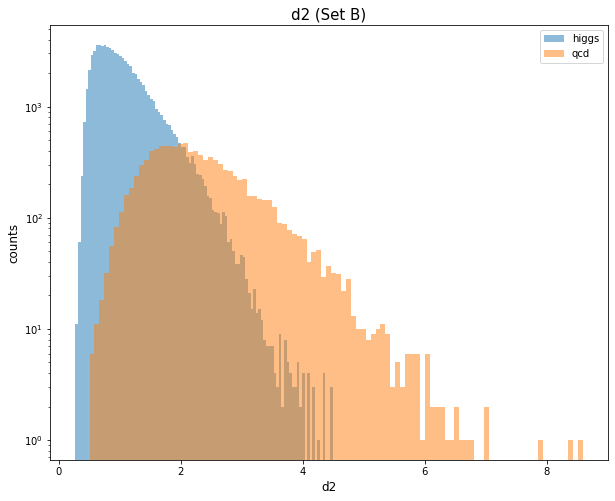

In [145]:
plt.hist(higgs['d2'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['d2'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("d2", size=12)
plt.yscale('log')
plt.ylabel("counts",size=12)
plt.title("d2 (Set B)",size=15);

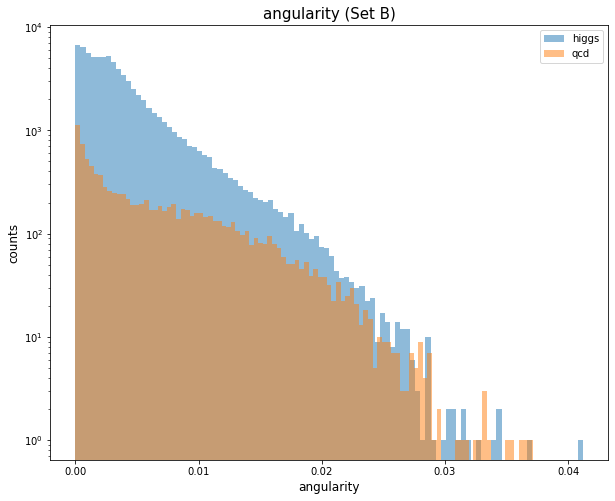

In [146]:
plt.hist(higgs['angularity'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['angularity'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("angularity", size=12)
plt.yscale('log')
plt.ylabel("counts",size=12)
plt.title("angularity (Set B)",size=15);



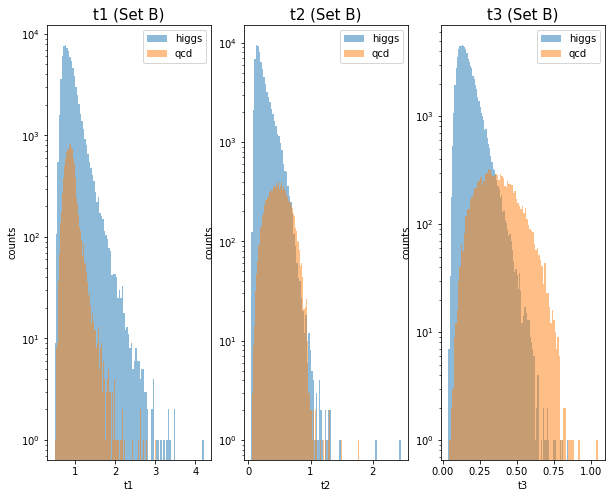

In [147]:
plt.subplots(1,3)
plt.subplot(1,3,1)
plt.hist(higgs['t1'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t1'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t1", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t1 (Set B)",size=15)

plt.subplot(1,3,2)
plt.hist(higgs['t2'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t2'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t2", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t2 (Set B)",size=15)

plt.subplot(1,3,3)
plt.hist(higgs['t3'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t3'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t3", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t3 (Set B)",size=15);

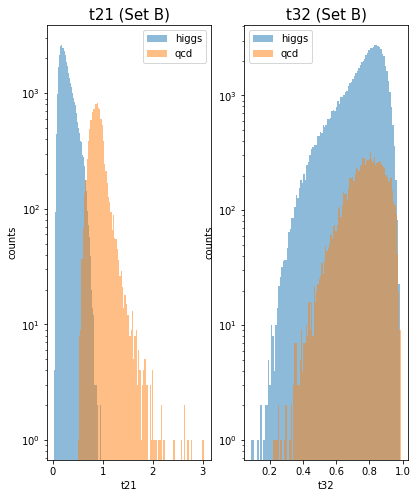

In [148]:
plt.subplots(1,2)
plt.subplot(1,3,1)
plt.hist(higgs['t21'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t1'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t21", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t21 (Set B)",size=15)

plt.subplot(1,3,2)
plt.hist(higgs['t32'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t32'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t32", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t32 (Set B)",size=15);

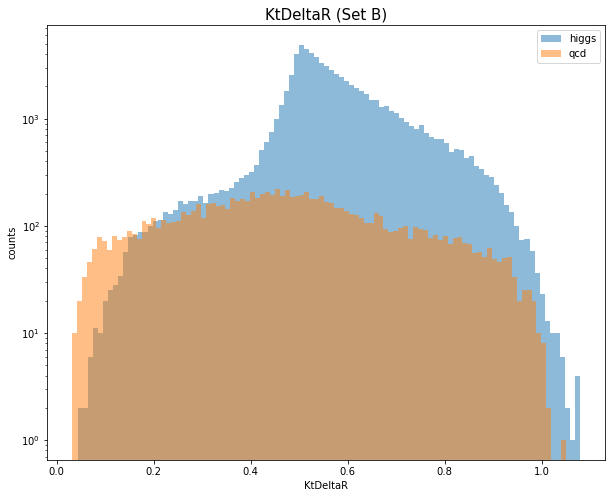

In [149]:
plt.hist(higgs['KtDeltaR'][indexh],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['KtDeltaR'][indexq],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("KtDeltaR", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("KtDeltaR (Set B)",size=15);

d2, t21 and KtDeltaR seems to be helpful with further improving expected significance.

##### 4. Optimize event selections using multiple features (if necessary). Find a set of feature cuts which can help you to achieve the best significance. Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings.

In [150]:
higgsc1 = higgs[higgs.mass.between(118.33,142.44)]
qcdc1 = qcd[qcd.mass.between(118.33,142.44)]

In [151]:
higgsc2 = higgsc1[higgsc1.t21.between(0,0.5)]
qcdc2 = qcdc1[qcdc1.t21.between(0,0.5)]

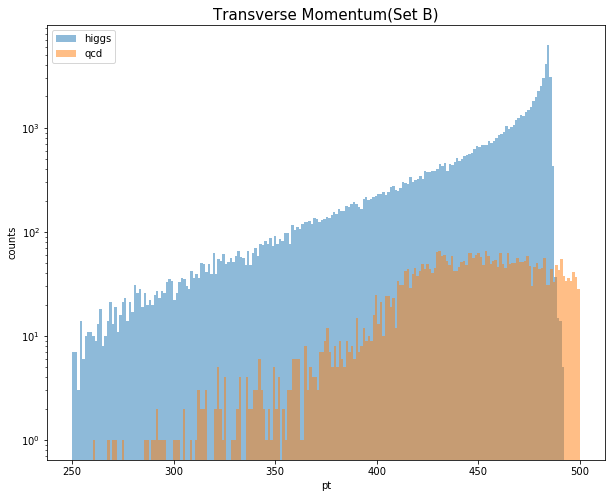

In [152]:
plt.hist(higgsc2['pt'],bins=200,alpha=0.5,label='higgs')
plt.hist(qcdc2['pt'],bins=200,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("pt", size=10)
plt.ylabel("counts",size=10)
plt.title("Transverse Momentum(Set B)",size=15) 
plt.yscale('log');

In [153]:
higgsc3 = higgsc1[higgsc1.KtDeltaR.between(0.5,max(higgs['KtDeltaR']))]
qcdc3 = qcdc1[qcdc1.KtDeltaR.between(0.5,max(higgs['KtDeltaR']))]

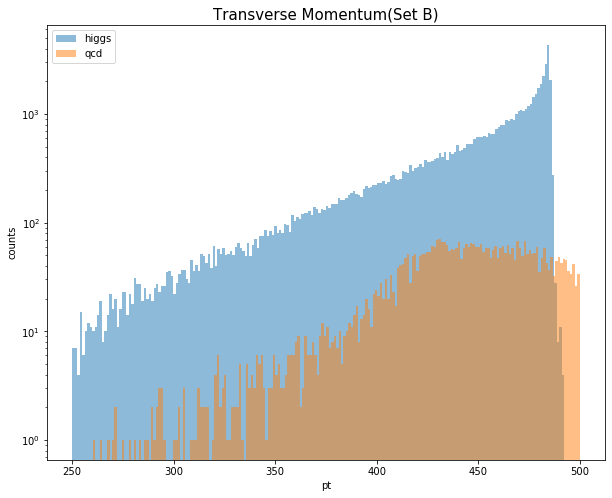

In [154]:
plt.hist(higgsc3['pt'],bins=200,alpha=0.5,label='higgs')
plt.hist(qcdc3['pt'],bins=200,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("pt", size=10)
plt.ylabel("counts",size=10)
plt.title("Transverse Momentum(Set B)",size=15) 
plt.yscale('log');

In [155]:
higgsc4 = higgsc1[higgsc1.d2.between(min(higgs['d2']),0.5)]
qcdc4 = qcdc1[qcdc1.d2.between(min(higgs['d2']),0.5)]

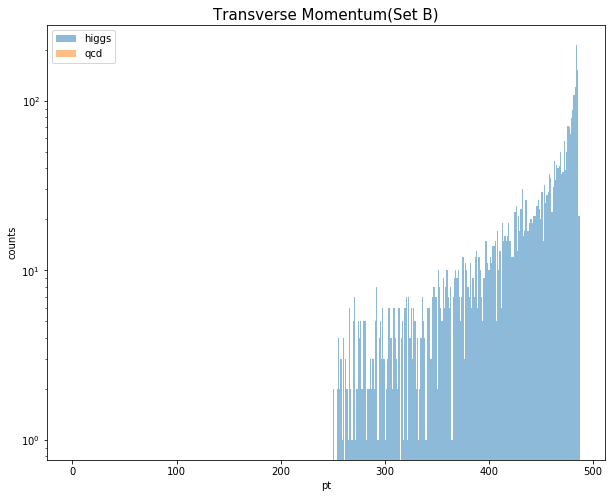

In [156]:
plt.hist(higgsc4['pt'],bins=200,alpha=0.5,label='higgs')
plt.hist(qcdc4['pt'],bins=200,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("pt", size=10)
plt.ylabel("counts",size=10)
plt.title("Transverse Momentum(Set B)",size=15) 
plt.yscale('log');

In [157]:
higgsc5 = higgsc1[higgsc1.t1.between(2,max(higgs['t1']))]
qcdc5 = qcdc1[qcdc1.t1.between(2,max(higgs['t1']))]

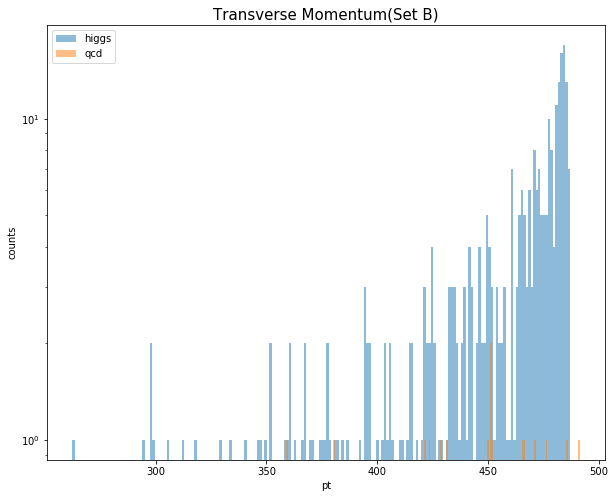

In [158]:
plt.hist(higgsc5['pt'],bins=200,alpha=0.5,label='higgs')
plt.hist(qcdc5['pt'],bins=200,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("pt", size=10)
plt.ylabel("counts",size=10)
plt.title("Transverse Momentum(Set B)",size=15) 
plt.yscale('log');